In [1]:
# [Homework 2] (~4.10)
# Load Image, View, Save - OpenCV, PIL
# Intensity Transform - Negative, Log, Gamma Transform
# Histogram Equalization
# Image Convolution - Average, Laplacian
# Nonlinear Filter - Median, Min, Max

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

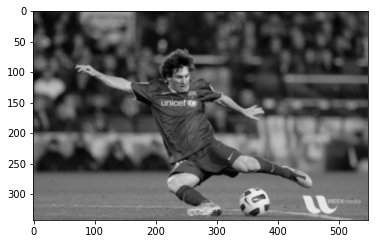

True

In [3]:
# 1 Load an color image in grayscale
img = cv2.imread('messi5.jpg',0)

# 2 Showing image
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.show()

# 3 Saving image
cv2.imwrite('gray_messi5.png',img)

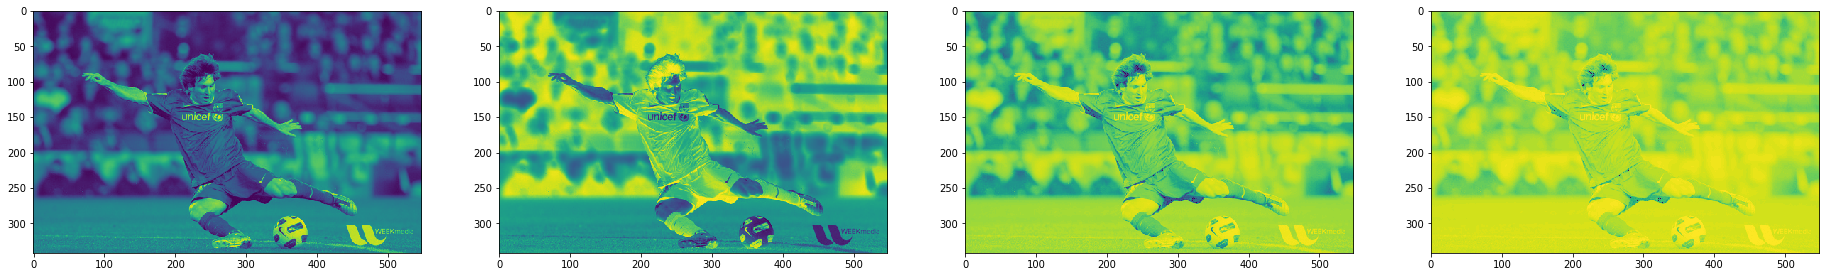

True

In [4]:
# 2 Intensity Transform - Negative, Log, Gamma Transform
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

img=cv2.imread('messi5.jpg', 0)
row, col = img.shape

# Negative s = L - 1 - r
neg_img = np.zeros((row,col),'uint8')
for i in range (0, row):
    for j in range (0, col):
        neg_img[i][j] = 255 - img[i][j]

# Log Transformations s = c * log(1 + r)
c = 50
log_img = np.zeros((row, col),'uint8')
for i in range (0, row):
    for j in range (0, col):
        log_img[i][j] = c * log10(1 + img[i][j])

# Power-Law (Gamma) Transformations s = c * r ^ y
gamma_img = np.zeros((row,col),'uint8')
c = 50
g = 0.1

for i in range (0, row):
    for j in range (0, col):
        gamma_img[i][j] = c * pow(img[i][j], g)

#cv2.imshow('original image',img)
#cv2.imshow('negative',negative)
#cv2.imshow('log transformation',log)
#cv2.imshow('gamma',gamma)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(neg_img)
axs[1].axis('on')
axs[2].imshow(log_img)
axs[2].axis('on')
axs[3].imshow(gamma_img)
axs[3].axis('on')
gray()
show()

# Saving images
cv2.imwrite('gray_messi5.png',img)
cv2.imwrite('neg_img.png',neg_img)
cv2.imwrite('log_img.png',log_img)
cv2.imwrite('gamma_img.png',gamma_img)

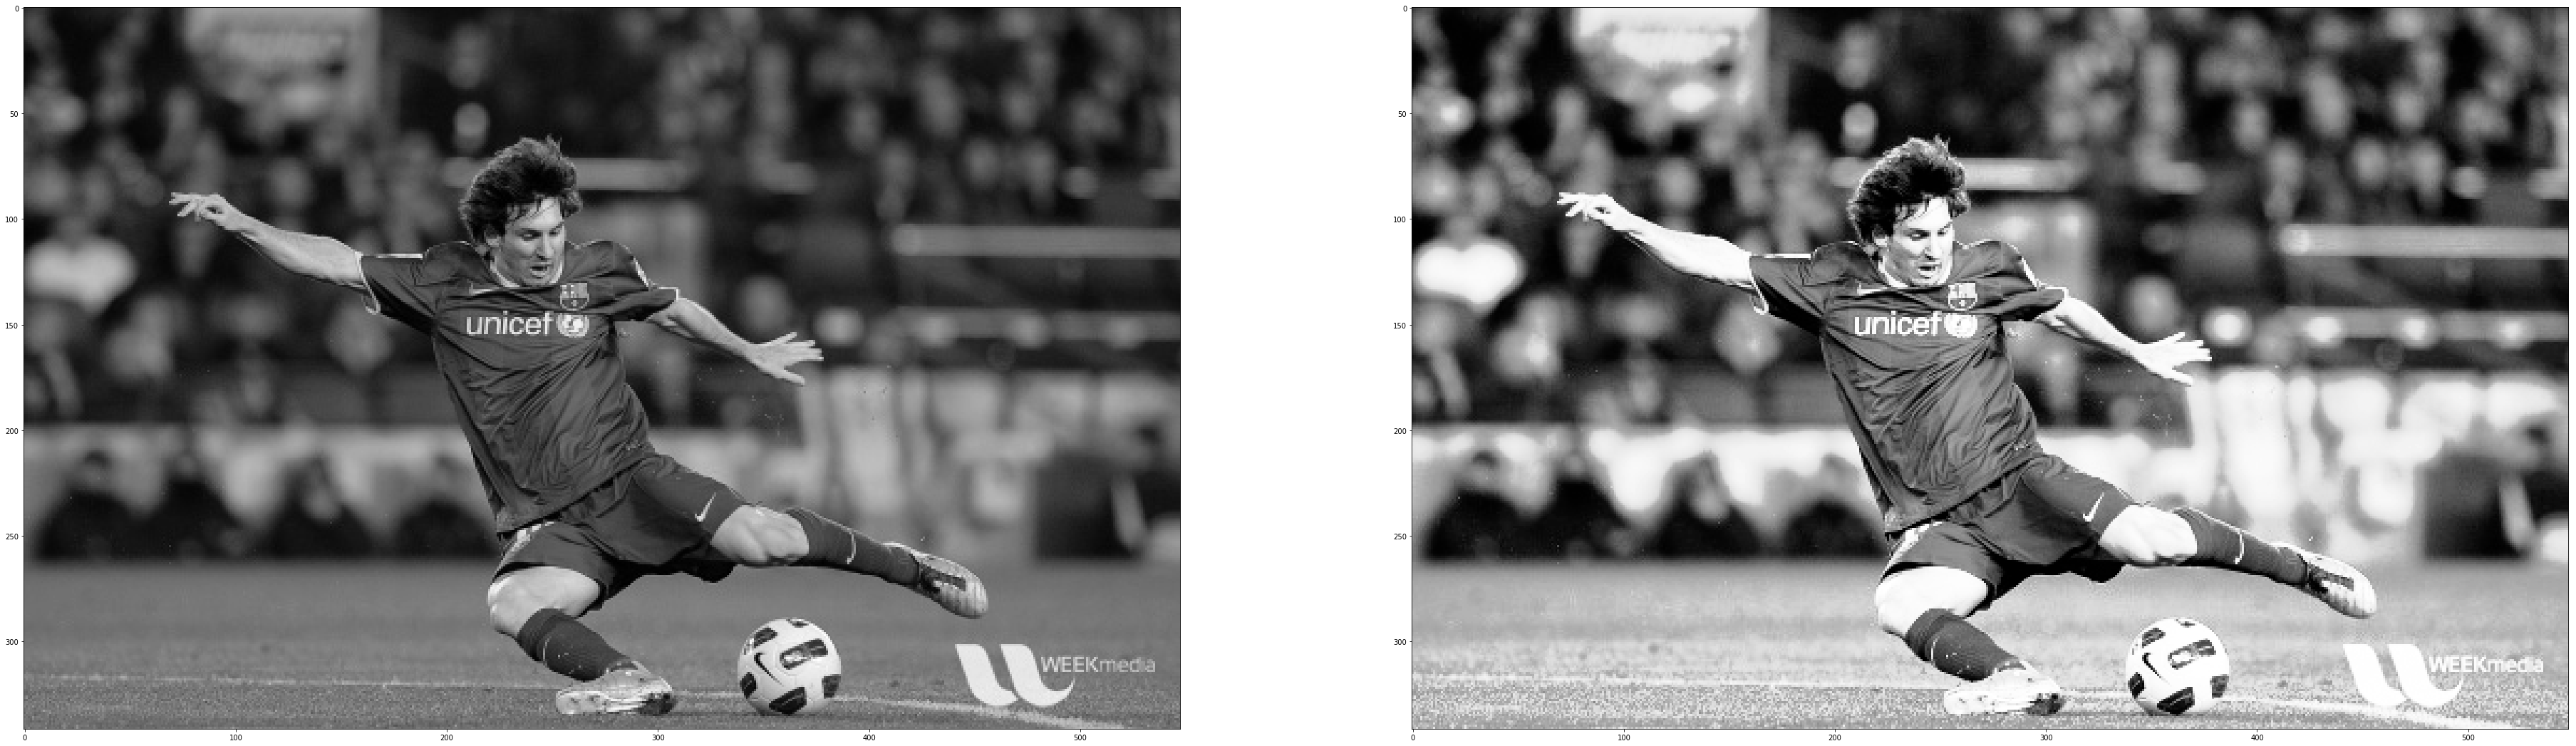

True

In [6]:
# 3 Histogram Equalization
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

img = cv2.imread('messi5.jpg', 0)
row, col = img.shape

# histogram of image h(rk) = nk, where rk is the kth intensity value, nk is the number of pixels in the image with intensity rk

# counting number of pixels in the image
histogram = np.zeros(256)
for i in range (row):
    for j in range (col):
        histogram[img[i][j]] = histogram[img[i][j]] + 1

# normalized histogram p(rk) = nk/MN
# nk: the number of pixels in the image of size MxN with intensity rk
pr = np.zeros(256)
for i in range (256):
    pr[i] = histogram[i] / (row * col)

# Histogram Equalization sk = T(tk)=(L-1)sum(pr(rk))
sk = np.zeros(256)
for i in range (256):
    sum = 0
    for j in range (i):
        sum = sum + pr[j]    
    sk[i] = 255 * sum

hist_equalixed_img = np.zeros((row, col))

for i in range (row):
    for j in range (col):
        hist_equalixed_img[i][j] = sk[img[i][j]]

#result = uint8(result)
#cv2.imshow('original', img)
#cv2.imshow('histogram equalization', result)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

fig, axs = subplots(1, 2, figsize = (64, 64))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(hist_equalixed_img)
axs[1].axis('on')
gray()
show()
cv2.imwrite('hist_equalixed_img.png', hist_equalixed_img)

In [ ]:
#coments
#histogram[img[0][0]]
#img[0][0]
#histogram[43]
#histogram
#np.sum(histogram)
#img.size
#np.sum(histogram) == img.size
#plt.hist(histogram, bins='auto')  # plt.hist passes it's arguments to np.histogram
#plt.title("Histogram with 'auto' bins")
#plt.show()

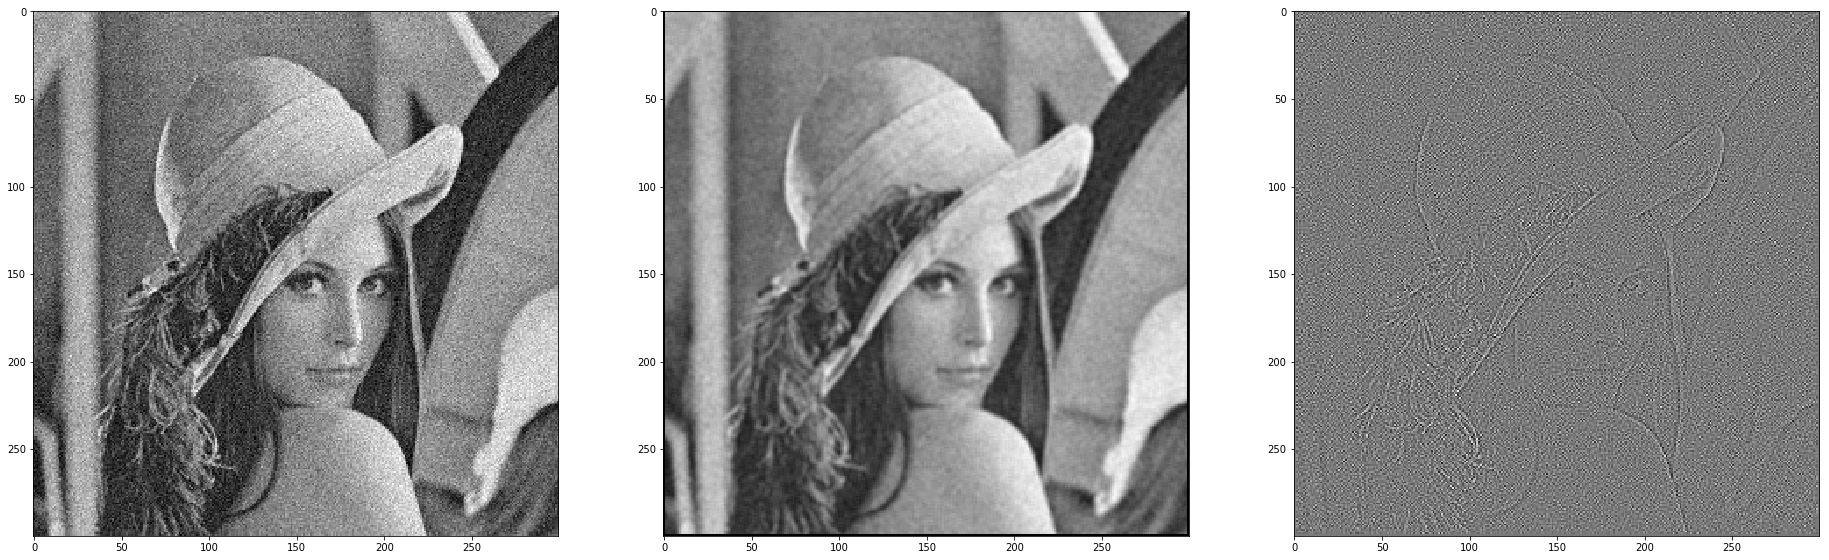

True

In [7]:
# 4 Image Convolution - Average, Laplacian
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

img = cv2.imread('Example_lena_denoise_noisy.jpg', 0)
row, col = img.shape
maskSize = 3
step = maskSize//2

# 1 Averaging
averaging = np.zeros((row, col))
weight = maskSize * maskSize
aver_mask = 1 / weight * np.ones((3, 3), dtype=int)

for k in range (step, row - step): # k: 1..340;   step = 1
    for l in range (step, col - step): # l: 1..546;  step = 1
        acc = 0
        for i in range (-step, step + 1): # i: [-1, 0, 1];   step = 1
            for j in range (-step, step + 1): # j: [-1, 0, 1];    step = 1
                acc = acc + img[k + i][l + j] * aver_mask[step + i][step + j]  # step = 1
        averaging[k][l] = acc

# 2 laplacian
lapl_mask = [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]
laplacian = np.zeros((row, col))

for k in range (step, row - step):
    for l in range (step, col - step):
        acc = 0
        for i in range (-step, step + 1):
            for j in range (-step, step + 1):
                acc = acc + img[k - i][l - j] * lapl_mask[step + i][step + j]
        laplacian[k][l] = acc        
        
#laplacian=uint8(laplacian)
#averaging=uint8(averaging)
#cv2.imshow('original',img)
#cv2.imshow('laplacian',laplacian)
#cv2.imshow('averaging',averaging)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

fig, axs = subplots(1, 3, figsize=(32, 32))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(averaging)
axs[1].axis('on')
axs[2].imshow(laplacian)
axs[2].axis('on')
gray()
show()

cv2.imwrite('laplacian.png',laplacian)
cv2.imwrite('averaging.png',averaging)

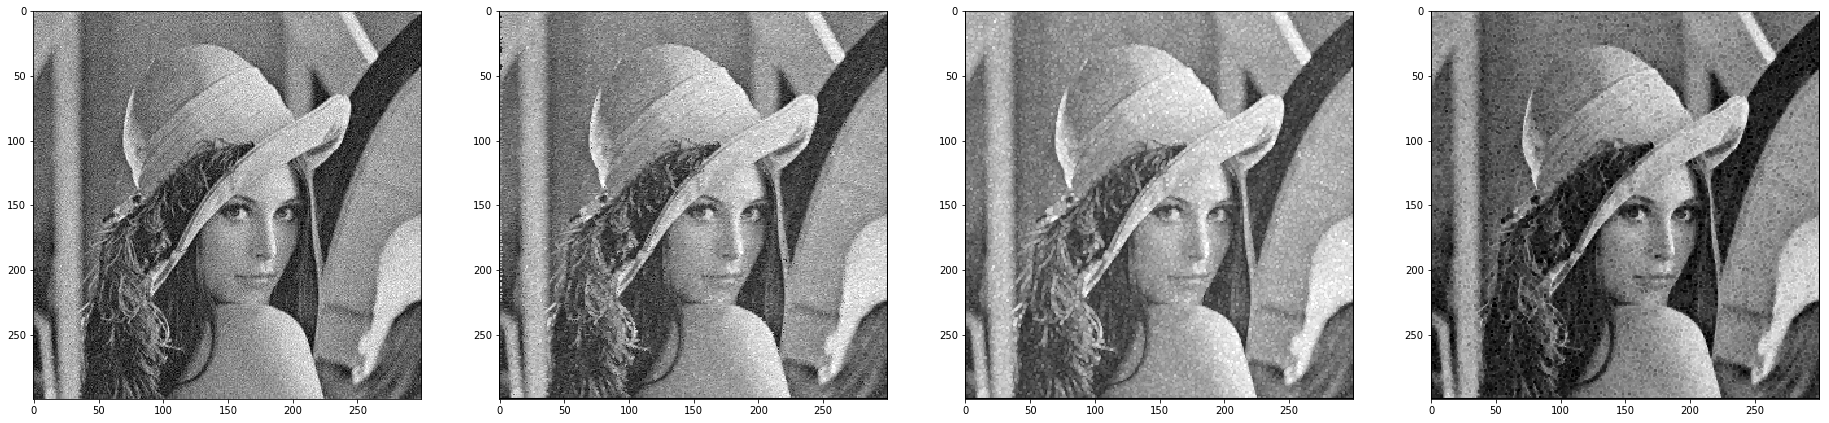

In [12]:
#median, max, min
from PIL import Image
from pylab import *
from math import *
import cv2
import numpy as np

img=cv2.imread('Example_lena_denoise_noisy.jpg',0)
row,col=img.shape

maskSize=3
median=np.zeros((row,col))
maximum=np.zeros((row,col))
minimum=np.zeros((row,col))
sort=np.zeros(maskSize*maskSize)

step = maskSize//2

for k in range (step, row - step): # 1 .. row-2
    for l in range (step, col - step): # 1 .. col-2
        x = 0
        for i in range (-step, step): # -1, 0
            for j in range (-step, step): # -1, 0
                #insertion sort
                insert = 0
                for a in range (x):
                    if sort[a] > img[k + i][l + j]:
                        for b in range (x, a, -1):
                            sort[b + 1] = sort[b]
                        sort[a] = img[k + i][l + j]
                        insert = 1
                if insert == 0:
                    sort[x] = img[k + i][l + j]
                x = x + 1       
        median[k][l] = sort[maskSize * step]

for k in range (step, row - step):
    for l in range (step, col - step):
        acc = 0
        for i in range (-step, step):
            for j in range (-step, step):
                if img[k + i][l + j] > acc: 
                    acc = img[k + i][l + j]
        maximum[k][l] = acc

for k in range (step, row - step):
    for l in range (step, col - step):
        acc = 255
        for i in range (- step, step):
            for j in range (- step, step):
                if img[k + i][l + j] < acc: 
                    acc = img[k + i][l + j]
        minimum[k][l] = acc
        
fig, axs = subplots(1, 4, figsize=(32, 32))
axs[0].imshow(img)
axs[0].axis('on')
axs[1].imshow(median)
axs[1].axis('on')
axs[2].imshow(maximum)
axs[2].axis('on')
axs[3].imshow(minimum)
axs[3].axis('on')
gray()
show()